In [56]:
import numpy as np
import pandas as pd
import networkx as nx
import wbgapi as wb
import matplotlib.pyplot as plt
import random
from itertools import combinations
import scipy.stats as stats

In [2]:
'''
This project wishes to test a hypothesis that there is divergence in the global economy and perhaps even a bifurcation due to the clashing between China and the Unites States. We wished to model this
in a minimal approach, and to that point I think we greatly succeded.

The variables used for this model were specifically the national ratios of GDP and FDI in comparison to global GDP and FDI in order to dermine national influence on a global scale. 
We believe these variables account for enough of the other underlying variables we'd wish to use in this model and therefore are ok with the model not having many parameters.
To that point, when modeled in a network these variables should account for international trade flows and national production, key factors in determining global economic influence.

###Scraper code###
#Variables : GDP : NY.GDP.MKTP.CD,  Foreign direct investment net inflows : BX.KLT.DINV.CD.WD
df = wb.data.DataFrame(['NY.GDP.MKTP.CD', 'BX.KLT.DINV.CD.WD'], time=range(2000, 2023), skipBlanks=True, columns='series').reset_index()
df.to_csv('fulldata.csv',index=False)
'''

"\nThis project wishes to test a hypothesis that there is divergence in the global economy and perhaps even a bifurcation due to the clashing between China and the Unites States. We wished to model this\nin a minimal approach, and to that point I think we greatly succeded.\n\nThe variables used for this model were specifically the national ratios of GDP and FDI in comparison to global GDP and FDI in order to dermine national influence on a global scale. \nWe believe these variables account for enough of the other underlying variables we'd wish to use in this model and therefore are ok with the model not having many parameters.\nTo that point, when modeled in a network these variables should account for international trade flows and national production, key factors in determining global economic influence.\n\n###Scraper code###\n#Variables : GDP : NY.GDP.MKTP.CD,  Foreign direct investment net inflows : BX.KLT.DINV.CD.WD\ndf = wb.data.DataFrame(['NY.GDP.MKTP.CD', 'BX.KLT.DINV.CD.WD'], t

In [57]:
#Read in Dataframe, sort it alphabetically
df = pd.read_csv('fulldata.csv')
df = df[['economy', 'time', 'NY.GDP.MKTP.CD', 'BX.KLT.DINV.CD.WD']]
df.sort_values(by=["economy"])

#Create a list of dataframes, each corresponding to one year between 2000 and 2021
yeardata = [list(df.groupby('time'))[i][1].sort_values(by="NY.GDP.MKTP.CD").dropna(subset=['NY.GDP.MKTP.CD']) for i in range(22)]
#Iterate through list
for year in range(len(yeardata)):
    #Filter out data that is not national
    yeardata[year] = yeardata[year][ (yeardata[year]['economy'] != 'SAS') &(yeardata[year]['economy'] != 'AFE') & (yeardata[year]['economy'] != 'AFW')& (yeardata[year]['economy'] != 'LAC') & (yeardata[year]['economy'] != 'LMC')& (yeardata[year]['economy'] != 'ARB') & (yeardata[year]['economy'] != 'CAF') & (yeardata[year]['economy'] != 'CEB') & (yeardata[year]['economy'] != 'EAP') & (yeardata[year]['economy'] != 'EAR') & (yeardata[year]['economy'] != 'EAS') & (yeardata[year]['economy'] != 'ECA') & (yeardata[year]['economy'] != 'ECS') & (yeardata[year]['economy'] != 'EMU') & (yeardata[year]['economy'] != 'EUU') & (yeardata[year]['economy'] != 'FCS') & (yeardata[year]['economy'] != 'HIC') & (yeardata[year]['economy'] != 'HPC') & (yeardata[year]['economy'] != 'IBD') & (yeardata[year]['economy'] != 'IBT') & (yeardata[year]['economy'] != 'IDA') & (yeardata[year]['economy'] != 'IDB') & (yeardata[year]['economy'] != 'IDX') & (yeardata[year]['economy'] != 'INX') & (yeardata[year]['economy'] != 'LCN') & (yeardata[year]['economy'] != 'LDC') & (yeardata[year]['economy'] != 'LIC' ) & (yeardata[year]['economy'] != 'LMc') & (yeardata[year]['economy'] != 'LMY') & (yeardata[year]['economy'] != 'LTE') & (yeardata[year]['economy'] != 'MEA') & (yeardata[year]['economy'] != 'MIC') & (yeardata[year]['economy'] != 'MNA') & (yeardata[year]['economy'] != 'NAC') & (yeardata[year]['economy'] != 'OED') & (yeardata[year]['economy'] != 'PRE') & (yeardata[year]['economy'] != 'PSE') & (yeardata[year]['economy'] != 'PSS') & (yeardata[year]['economy'] != 'PST') & (yeardata[year]['economy'] != 'SSA') & (yeardata[year]['economy'] != 'SSF') & (yeardata[year]['economy'] != 'SST') & (yeardata[year]['economy'] != 'TEA') & (yeardata[year]['economy'] != 'TEC') & (yeardata[year]['economy'] != 'TLA') & (yeardata[year]['economy'] != 'TMN')& (yeardata[year]['economy'] != 'TSA')& (yeardata[year]['economy'] != 'TSS')& (yeardata[year]['economy'] != 'UMC')& (yeardata[year]['economy'] != 'WLD')]
    #calculate ratios
    yeardata[year]['gdp_ratios'] = yeardata[year]['NY.GDP.MKTP.CD'] / np.sum(yeardata[year]['NY.GDP.MKTP.CD'])
    yeardata[year]['fdi_ratios'] = yeardata[year]['BX.KLT.DINV.CD.WD'] / np.sum(yeardata[year]['BX.KLT.DINV.CD.WD'])    

In [88]:
d00 = yeardata[0]
d00.sort_values('NY.GDP.MKTP.CD')
gdp00 = d00.tail(10)
gdp00 = gdp00[['economy','NY.GDP.MKTP.CD', 'BX.KLT.DINV.CD.WD']]
gdp00.to_csv('2000.csv')

d10 = yeardata[10]
d10.sort_values('NY.GDP.MKTP.CD')
gdp10 = d10.tail(10)
gdp10 = gdp10[['economy','NY.GDP.MKTP.CD', 'BX.KLT.DINV.CD.WD']]
gdp10.to_csv('2010.csv')

d21 = yeardata[21]
d21.sort_values('NY.GDP.MKTP.CD')
gdp21 = d21.tail(10)
gdp21 = gdp21[['economy','NY.GDP.MKTP.CD', 'BX.KLT.DINV.CD.WD']]
gdp21.to_csv('2021.csv')

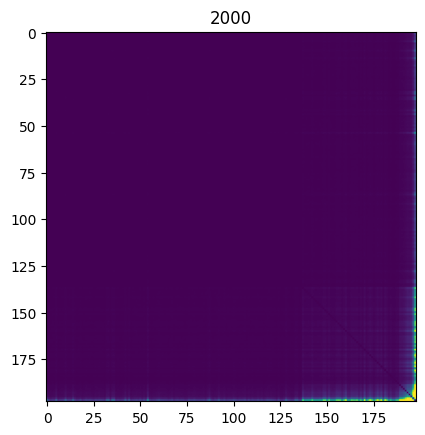

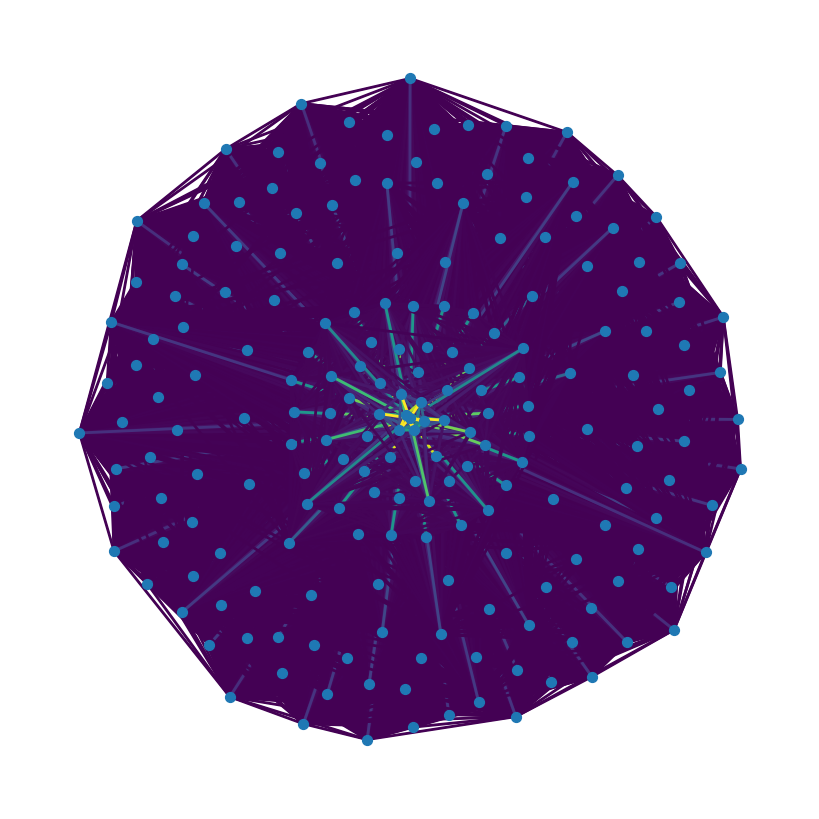

Graph with 198 nodes and 19500 edges


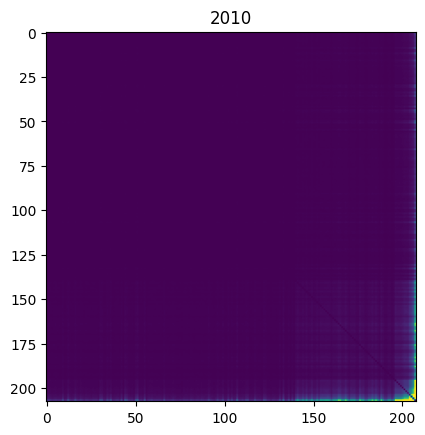

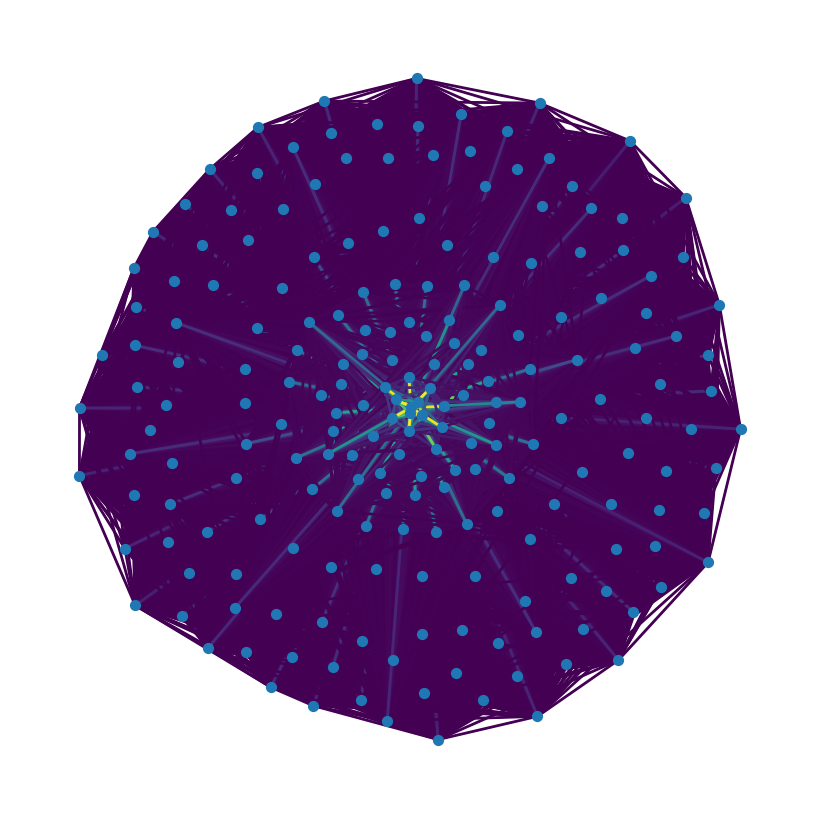

Graph with 208 nodes and 21525 edges


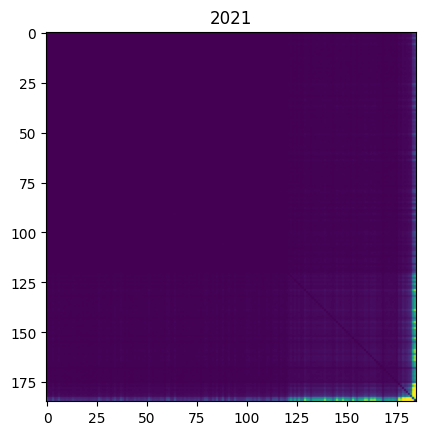

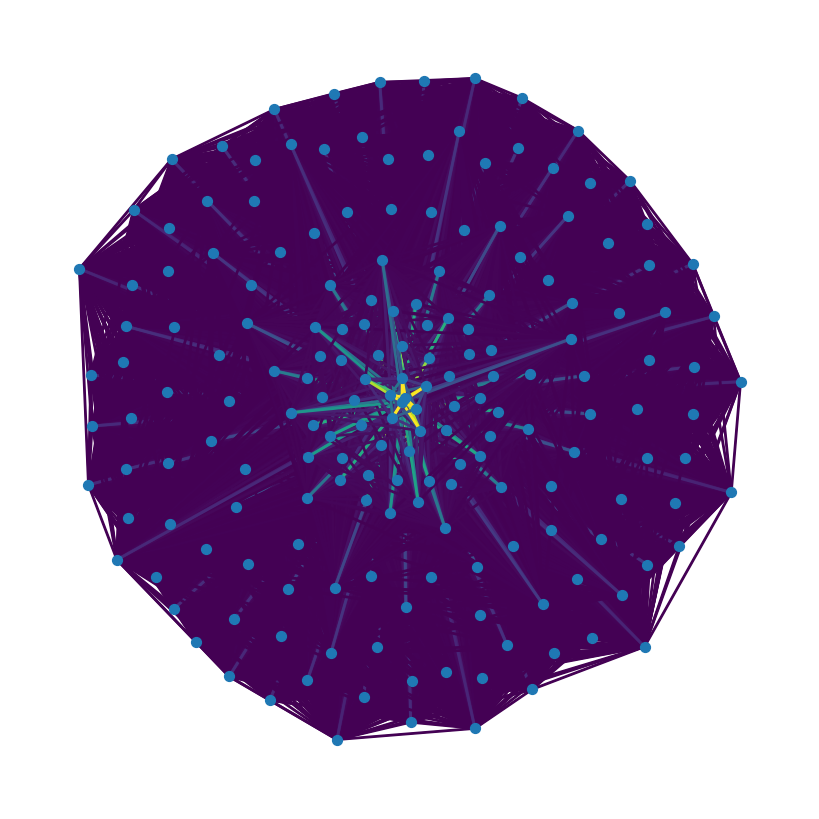

Graph with 185 nodes and 17015 edges


In [4]:
'''
This section takes sample statistics of many key network metrics and plots the most likely networks for 2000, 2010, and 2021.
'''
#initialize year adjacency matrices and lists of metrics
samples = 100
g00 = np.zeros((198, 198))
g10 = np.zeros((208, 208))
g21 = np.zeros((185, 185))
#average neighbor degree metrics
average_neighbor_degree = [0] * samples
average_degree_connectivity = [0] * samples
#centrality metrics
betweenness_centrality = [0] * samples
eigenvector_centrality = [0] * samples
closeness_centrality = [0] * samples
cliques = [0] * samples
#initialization for the Kernighan Lin Bisection Algorithm
sphere_1_00 = list()
sphere_2_00 = list()
sphere_1_10 = list()
sphere_2_10 = list()
sphere_1_21 = list()
sphere_2_21 = list()



for i in range(samples):
    '''
    Network Initialization Section
    
    For each of the three years we wish to study, the documentation in this loop will generalize to all years.
    This section initializes a Configuration model for a given year based upon an arbitrary function with tunable parameters. 
    '''
    #Turn Dataframe data from above into lists and replace na values with the mean values to add noise to the model
    gdp_ratios_21 = list(yeardata[21]['gdp_ratios'])
    mean_fdi_21 = yeardata[21]['fdi_ratios'].mean()
    yeardata[21]['fdi_ratios'] = yeardata[21]['fdi_ratios'].fillna(mean_fdi_21)
    fdi_ratios_21 = list(yeardata[21]['fdi_ratios'])
    #Create sequence of degrees for configuration model
    #The first layer groups all countries into three sections : those whose proportion of global GDP is greater than 1%, between 1 and .1 %, and less than .1% of the global economy. 
    #For the latter two a random number of edges is generated. For the former, the countries number of edges is a function of the size of its national GDP.
    connections_21 = [int(100 * i) * np.random.randint(4, 6) if i >  .01 else np.random.randint(5, 9) if .01 > i > .001 else np.random.randint(2, 6) for i in gdp_ratios_21]
    #The second layer adds and additional normalization layer while performing similar logic to the first layer, except with FDI ratios instead of GDP ratios.
    connections_21 = [int(connections_21[i] * np.random.randint(80,99) / 200) * 2 if fdi_ratios_21[i] > .01 else int(connections_21[i] * np.random.randint(60,79) / 200) * 2 if .01 >= fdi_ratios_21[i] > .001 else int(connections_21[i] * np.random.randint(40,59) / 200) * 2 for i in range(len(connections_21))]

    gdp_ratios_10 = list(yeardata[10]['gdp_ratios'])
    mean_fdi_10 = yeardata[10]['fdi_ratios'].mean()
    yeardata[10]['fdi_ratios'] = yeardata[10]['fdi_ratios'].fillna(mean_fdi_10)
    fdi_ratios_10 = list(yeardata[10]['fdi_ratios'])
    connections_10 = [int(100 * i) * np.random.randint(4, 6) if i >  .01 else np.random.randint(5, 9) if .01 > i > .001 else np.random.randint(2, 6) for i in gdp_ratios_10]
    connections_10 = [int(connections_10[i] * np.random.randint(80,99) / 200) * 2 if fdi_ratios_10[i] > .01 else int(connections_10[i] * np.random.randint(60,79) / 200) * 2 if .01 >= fdi_ratios_10[i] > .001 else int(connections_10[i] * np.random.randint(40,59) / 200) * 2 for i in range(len(connections_10))]

    gdp_ratios_00 = list(yeardata[0]['gdp_ratios'])
    mean_fdi_00 = yeardata[0]['fdi_ratios'].mean()
    yeardata[0]['fdi_ratios'] = yeardata[0]['fdi_ratios'].fillna(mean_fdi_00)
    fdi_ratios_00 = list(yeardata[0]['fdi_ratios'])
    connections_00 = [int(100 * i) * np.random.randint(4, 6) if i >  .01 else np.random.randint(5, 9) if .01 > i > .001 else np.random.randint(2, 6) for i in gdp_ratios_00]
    connections_00 = [int(connections_00[i] * np.random.randint(80,99) / 200) * 2 if fdi_ratios_00[i] > .01 else int(connections_00[i] * np.random.randint(60,79) / 200) * 2 if .01 >= fdi_ratios_00[i] > .001 else int(connections_00[i] * np.random.randint(40,59) / 200) * 2 for i in range(len(connections_00))]

    
    '''
    Network Sampling Section
    
    Creates an average network from repeated sampling of a network model which is a function of the degree sequence
    '''
    #initialize adjcacency Matrix
    adj_00 = np.zeros( ( len(connections_00), len(connections_00) ) )
    for g in range(samples):
        g_00 = nx.expected_degree_graph(connections_00)
        g_00.remove_edges_from(nx.selfloop_edges(g_00))
        #sum over all adjacency matrices of the samples
        adj_00 += nx.adjacency_matrix(g_00)
    #divide by number of samples
    adj_00 /= samples

    adj_10 = np.zeros( ( len(connections_10), len(connections_10) ) )
    for g in range(samples):
        g_10 = nx.expected_degree_graph(connections_10)
        g_10.remove_edges_from(nx.selfloop_edges(g_10))
        adj_10 += nx.adjacency_matrix(g_10)
    adj_10 /= samples
    
    adj_21 = np.zeros( ( len(connections_21), len(connections_21) ) )
    for g in range(samples):
        g_21 = nx.expected_degree_graph(connections_21)
        g_21.remove_edges_from(nx.selfloop_edges(g_21))
        adj_21 += nx.adjacency_matrix(g_21)
    adj_21 /= samples
    
    '''
    New Random Graph Initialization Section
    
    These newly generated graphs will have better accuracy in terms of node degree and edge frequency in general. They will be used to compute the average network statistics later in the project.
    '''
    #initialize new graph
    avg_g_00 = nx.Graph()
    #load in probability data
    node_probabilities_00 = [list(i) for i in adj_00]
    #loop through all nodes in graph
    for node in range(len(node_probabilities_00)):
        #add all nodes to graph
        avg_g_00.add_node(node)
        #loop through all nodes in graph again
        for probability in range(len(node_probabilities_00[node])):
            #add edge  to graph if the probability of the edge being there is greater than the randomly generated number between 0 and 1
            avg_g_00.add_edge(node, probability) if (np.random.rand()) < node_probabilities_00[node][probability] else None

            
    avg_g_10 = nx.Graph()
    node_probabilities_10 = [list(i) for i in adj_10]

    for node in range(len(node_probabilities_10)):
        avg_g_10.add_node(node)
        for probability in range(len(node_probabilities_10[node])):
            avg_g_10.add_edge(node, probability) if (np.random.rand()) < node_probabilities_10[node][probability] else None
            
    avg_g_21 = nx.Graph()
    node_probabilities_21 = [list(i) for i in adj_21]

    for node in range(len(node_probabilities_21)):
        for probability in range(len(node_probabilities_21[node])):
            avg_g_21.add_edge(node, probability) if (np.random.rand()) < node_probabilities_21[node][probability] else None
    
    
    '''
    Network Statistics Section
    This section goes through a common range of metrics and algorithms that one would principally run on a network when trying to determine its structure
    '''
    average_neighbor_degree[i] = ( np.mean(list(dict(nx.average_neighbor_degree(avg_g_00)).values())) , np.mean(list(dict(nx.average_neighbor_degree(avg_g_10)).values())) , np.mean(list(dict(nx.average_neighbor_degree(avg_g_21)).values())))
    average_degree_connectivity[i] = (np.mean(list(dict(nx.average_degree_connectivity(avg_g_00)).values())) ,np.mean(list(dict(nx.average_degree_connectivity(avg_g_10)).values())) , np.mean(list(dict(nx.average_degree_connectivity(avg_g_21)).values())))

    betweenness_centrality[i] = (list(dict(nx.betweenness_centrality(avg_g_00)).values()),list(dict(nx.betweenness_centrality(avg_g_10)).values()), list(dict(nx.betweenness_centrality(avg_g_21)).values()))
    eigenvector_centrality[i] = (list(dict(nx.eigenvector_centrality(avg_g_00)).values()),list(dict(nx.eigenvector_centrality(avg_g_10)).values()), list(dict(nx.eigenvector_centrality(avg_g_21)).values()))
    closeness_centrality[i] = ([nx.closeness_centrality(avg_g_00, u) for u in avg_g_00.nodes()],[nx.closeness_centrality(avg_g_10, u) for u in avg_g_10.nodes()],[nx.closeness_centrality(avg_g_21, u) for u in avg_g_21.nodes()])

    cliques[i] = (list(dict(nx.clique.number_of_cliques(avg_g_00)).values()),list(dict(nx.clique.number_of_cliques(avg_g_10)).values()), list(dict(nx.clique.number_of_cliques(avg_g_21)).values()))

    
    '''
    The Kernighan Lin bisection algorithm was the first community detection algorithm and therefore we felt that it would be a good baseline to compare possible further experiments to.
    '''
    s100, s200 = nx.algorithms.community.kernighan_lin_bisection(avg_g_00)
    s110, s210 = nx.algorithms.community.kernighan_lin_bisection(avg_g_10)
    s121, s221 = nx.algorithms.community.kernighan_lin_bisection(avg_g_21)
    
    #add spheres to spheres list 
    sphere_1_00.append(list(s100))
    sphere_2_00.append(list(s200))
    sphere_1_10.append(list(s110))
    sphere_2_10.append(list(s210))
    sphere_1_21.append(list(s121))
    sphere_2_21.append(list(s221))
    
    #pad current adjacency matrices in case of any inconsistinces in graph sizes
    np.pad(adj_00, pad_width=(abs(g00.shape[0] - adj_00.shape[0]),abs(g00.shape[1] - adj_00.shape[1])) ,mode='minimum') 
    np.pad(adj_10, pad_width=(abs(g10.shape[0] - adj_10.shape[0]),abs(g10.shape[1] - adj_10.shape[1])) ,mode='minimum') 
    np.pad(adj_21, pad_width=(abs(g21.shape[0] - adj_21.shape[0]),abs(g21.shape[1] - adj_21.shape[1])) ,mode='minimum') 

    #add adjacency matrices to global year matrices
    g00 += adj_00
    g10 += adj_10
    g21 += adj_21

#calculate the average of the average adjacency matrix
g00 /= samples
g10 /= samples
g21 /= samples

#Plot the data
plt.figure()
plt.imshow(g00)
plt.title('2000')
plt.show()
#initialize the network
g00 = nx.from_numpy_array(np.array(g00))
#plot the network
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(g00, k=0.2, seed=42)
# Get the edge weights as a list
edge_weights = [d['weight'] for (u, v, d) in g00.edges(data=True)]
# Normalize the edge weights
edge_weights_normalized = [w / max(edge_weights) for w in edge_weights]
# Draw the nodes
nx.draw(g00, pos, node_size=50)
# Draw the edges with colors based on the edge weights
nx.draw_networkx_edges(g00, pos, edge_color=edge_weights_normalized, width=2)
plt.show()

print(g00)

plt.figure()
plt.imshow(g10)
plt.title('2010')
plt.show()

g10 = nx.from_numpy_array(np.array(g10))

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(g10, k=0.2, seed=42)
# Get the edge weights as a list
edge_weights = [d['weight'] for (u, v, d) in g10.edges(data=True)]
# Normalize the edge weights
edge_weights_normalized = [w / max(edge_weights) for w in edge_weights]
# Draw the nodes
nx.draw(g10, pos, node_size=50)
# Draw the edges with colors based on the edge weights
nx.draw_networkx_edges(g10, pos, edge_color=edge_weights_normalized, width=2)
plt.show()

print(g10)


plt.figure()
plt.imshow(g21)
plt.title('2021')
plt.show()

g21 = nx.from_numpy_array(np.array(g21))

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(g21, k=0.2, seed=42)
# Get the edge weights as a list
edge_weights = [d['weight'] for (u, v, d) in g21.edges(data=True)]
# Normalize the edge weights
edge_weights_normalized = [w / max(edge_weights) for w in edge_weights]
# Draw the nodes
nx.draw(g21, pos, node_size=50)
# Draw the edges with colors based on the edge weights
nx.draw_networkx_edges(g21, pos, edge_color=edge_weights_normalized, width=2)
plt.show()

print(g21)

In [43]:
g10_adj = nx.adjacency_matrix(g10).todense()
g00_adj = nx.adjacency_matrix(g00).todense()

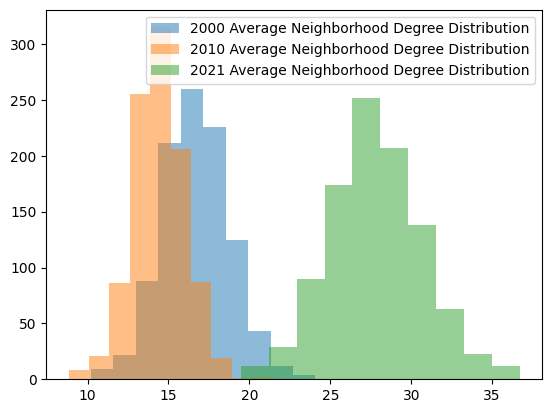

6.276517502653773e-140
0.0
0.0


In [5]:
#calcualte normal distrubutions of the averages of the network statistics calculated in the first section
average_degree_2000, average_degree_2010, average_degree_2021 = [i for i,j,k in average_neighbor_degree] ,  [j for i,j,k in average_neighbor_degree],  [k for i,j,k in average_neighbor_degree]

average_degree_2000_m = np.mean(average_degree_2000)
average_degree_2010_m = np.mean(average_degree_2010)
average_degree_2021_m = np.mean(average_degree_2021)

average_degree_2000_s = np.std(average_degree_2000)
average_degree_2010_s = np.std(average_degree_2010)
average_degree_2021_s = np.std(average_degree_2021)

samples = 1000

x1 = np.random.normal(average_degree_2000_m, average_degree_2000_s, samples)
x2 = np.random.normal(average_degree_2010_m, average_degree_2010_s, samples)
x3 = np.random.normal(average_degree_2021_m, average_degree_2021_s, samples)



plt.hist(x1, alpha=0.5, label='2000 Average Neighborhood Degree Distribution')
plt.hist(x2, alpha=0.5, label='2010 Average Neighborhood Degree Distribution')
plt.hist(x3, alpha=0.5, label='2021 Average Neighborhood Degree Distribution')
plt.legend(loc='upper right')
plt.show()

p_val_x12 = list(stats.ttest_ind(x1, x2, equal_var=True))[1]
p_val_x23 = list(stats.ttest_ind(x2, x3, equal_var=True))[1]
p_val_x13 = list(stats.ttest_ind(x1, x3, equal_var=True))[1]

print(p_val_x12)
print(p_val_x23)
print(p_val_x13)

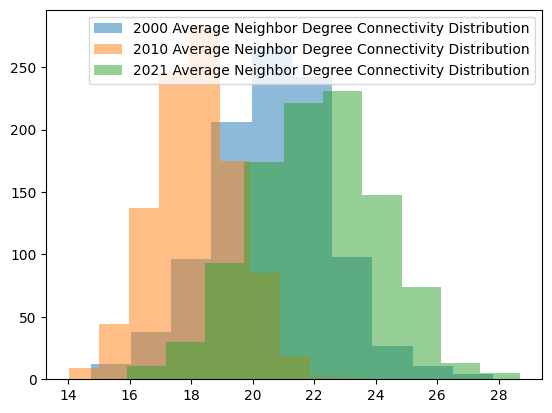

1.1236367157982432e-191
0.0
6.020939889301022e-53


In [17]:
average_degree_connectivity_2000, average_degree_connectivity_2010, average_degree_connectivity_2021 = [i for i,j,k in average_degree_connectivity] ,  [j for i,j,k in average_degree_connectivity],  [k for i,j,k in average_degree_connectivity]

average_degree_connectivity_2000_m = np.mean(average_degree_connectivity_2000)
average_degree_connectivity_2010_m = np.mean(average_degree_connectivity_2010)
average_degree_connectivity_2021_m = np.mean(average_degree_connectivity_2021)

average_degree_connectivity_2000_s = np.std(average_degree_connectivity_2000)
average_degree_connectivity_2010_s = np.std(average_degree_connectivity_2010)
average_degree_connectivity_2021_s = np.std(average_degree_connectivity_2021)

samples = 1000

x1 = np.random.normal(average_degree_connectivity_2000_m, average_degree_connectivity_2000_s, samples)
x2 = np.random.normal(average_degree_connectivity_2010_m, average_degree_connectivity_2010_s, samples)
x3 = np.random.normal(average_degree_connectivity_2021_m, average_degree_connectivity_2021_s, samples)

plt.figure()
plt.hist(x1, alpha=0.5, label='2000 Average Neighbor Degree Connectivity Distribution')
plt.hist(x2, alpha=0.5, label='2010 Average Neighbor Degree Connectivity Distribution')
plt.hist(x3, alpha=0.5, label='2021 Average Neighbor Degree Connectivity Distribution')
plt.legend(loc='upper right')
plt.show()

p_val_x12 = list(stats.ttest_ind(x1, x2, equal_var=True))[1]
p_val_x23 = list(stats.ttest_ind(x2, x3, equal_var=True))[1]
p_val_x13 = list(stats.ttest_ind(x1, x3, equal_var=True))[1]

print(p_val_x12)
print(p_val_x23)
print(p_val_x13)

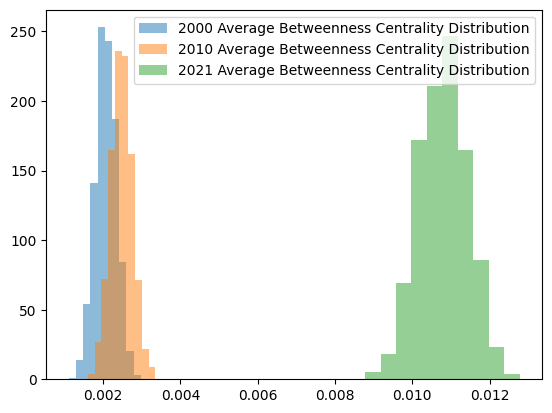

2.326119337357085e-189
0.0
0.0


In [7]:
betweenness_centrality_2000,betweenness_centrality_2010, betweenness_centrality_2021 = [i for i,j,k in betweenness_centrality] ,  [j for i,j,k in betweenness_centrality], [k for i,j,k in betweenness_centrality]

betweenness_centrality_2000_m = np.mean([np.mean(betweenness_centrality_2000[i]) for i in range(len(betweenness_centrality_2000))])
betweenness_centrality_2010_m = np.mean([np.mean(betweenness_centrality_2010[i]) for i in range(len(betweenness_centrality_2010))])
betweenness_centrality_2021_m = np.mean([np.mean(betweenness_centrality_2021[i]) for i in range(len(betweenness_centrality_2021))])

betweenness_centrality_2000_s = np.std([np.mean(betweenness_centrality_2000[i]) for i in range(len(betweenness_centrality_2000))])
betweenness_centrality_2010_s = np.std([np.mean(betweenness_centrality_2010[i]) for i in range(len(betweenness_centrality_2010))])
betweenness_centrality_2021_s = np.std([np.mean(betweenness_centrality_2021[i]) for i in range(len(betweenness_centrality_2021))])

samples = 1000

x1 = np.random.normal(betweenness_centrality_2000_m, betweenness_centrality_2000_s, samples)
x2 = np.random.normal(betweenness_centrality_2010_m, betweenness_centrality_2010_s, samples)
x3 = np.random.normal(betweenness_centrality_2021_m, betweenness_centrality_2021_s, samples)


plt.hist(x1, alpha=0.5, label='2000 Average Betweenness Centrality Distribution')
plt.hist(x2, alpha=0.5, label='2010 Average Betweenness Centrality Distribution')
plt.hist(x3, alpha=0.5, label='2021 Average Betweenness Centrality Distribution')

plt.legend(loc='upper right')
plt.show()

p_val_x12 = list(stats.ttest_ind(x1, x2, equal_var=True))[1]
p_val_x23 = list(stats.ttest_ind(x2, x3, equal_var=True))[1]
p_val_x13 = list(stats.ttest_ind(x1, x3, equal_var=True))[1]

print(p_val_x12)
print(p_val_x23)
print(p_val_x13)

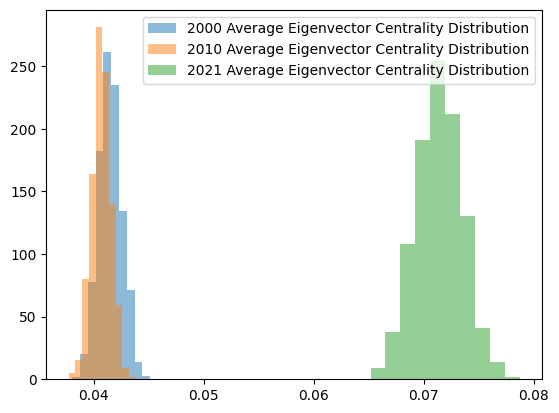

8.704035836639606e-73
0.0
0.0


In [8]:
eigenvector_centrality_2000, eigenvector_centrality_2010, eigenvector_centrality_2021 = [i for i,j,k in eigenvector_centrality] ,  [j for i,j,k in eigenvector_centrality] ,  [k for i,j,k in eigenvector_centrality]

eigenvector_centrality_2000_m = np.mean([np.mean(eigenvector_centrality_2000[i]) for i in range(len(eigenvector_centrality_2000))])
eigenvector_centrality_2021_m = np.mean([np.mean(eigenvector_centrality_2021[i]) for i in range(len(eigenvector_centrality_2021))])
eigenvector_centrality_2010_m = np.mean([np.mean(eigenvector_centrality_2010[i]) for i in range(len(eigenvector_centrality_2010))])

eigenvector_centrality_2000_s = np.std([np.mean(eigenvector_centrality_2000[i]) for i in range(len(eigenvector_centrality_2000))])
eigenvector_centrality_2010_s = np.std([np.mean(eigenvector_centrality_2010[i]) for i in range(len(eigenvector_centrality_2010))])
eigenvector_centrality_2021_s = np.std([np.mean(eigenvector_centrality_2021[i]) for i in range(len(eigenvector_centrality_2021))])

samples = 1000

x1 = np.random.normal(eigenvector_centrality_2000_m, eigenvector_centrality_2000_s, samples)
x2 = np.random.normal(eigenvector_centrality_2010_m, eigenvector_centrality_2010_s, samples)
x3 = np.random.normal(eigenvector_centrality_2021_m, eigenvector_centrality_2021_s, samples)


plt.hist(x1, alpha=0.5, label='2000 Average Eigenvector Centrality Distribution')
plt.hist(x2, alpha=0.5, label='2010 Average Eigenvector Centrality Distribution')
plt.hist(x3, alpha=0.5, label='2021 Average Eigenvector Centrality Distribution')
plt.legend(loc='upper right')
plt.show()

p_val_x12 = list(stats.ttest_ind(x1, x2, equal_var=True))[1]
p_val_x23 = list(stats.ttest_ind(x2, x3, equal_var=True))[1]
p_val_x13 = list(stats.ttest_ind(x1, x3, equal_var=True))[1]

print(p_val_x12)
print(p_val_x23)
print(p_val_x13)

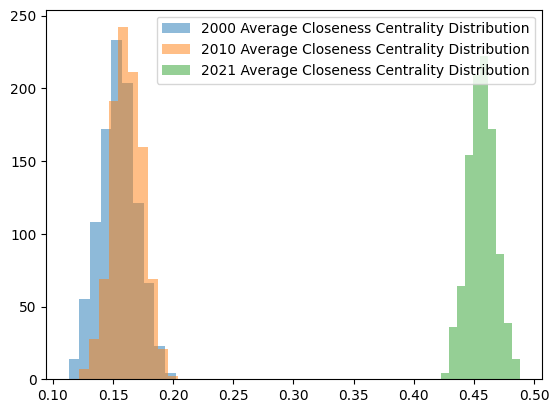

1.866648520202458e-30
0.0
0.0


In [9]:
closeness_centrality_2000,closeness_centrality_2010, closeness_centrality_2021 = [i for i,j,k in closeness_centrality] ,  [j for i,j,k in closeness_centrality],  [k for i,j,k in closeness_centrality]

closeness_centrality_2000_m = np.mean([np.mean(closeness_centrality_2000[i]) for i in range(len(closeness_centrality_2000))])
closeness_centrality_2010_m = np.mean([np.mean(closeness_centrality_2010[i]) for i in range(len(closeness_centrality_2010))])
closeness_centrality_2021_m = np.mean([np.mean(closeness_centrality_2021[i]) for i in range(len(closeness_centrality_2021))])

closeness_centrality_2000_s = np.std([np.mean(closeness_centrality_2000[i]) for i in range(len(closeness_centrality_2000))])
closeness_centrality_2010_s = np.std([np.mean(closeness_centrality_2010[i]) for i in range(len(closeness_centrality_2010))])
closeness_centrality_2021_s = np.std([np.mean(closeness_centrality_2021[i]) for i in range(len(closeness_centrality_2021))])

samples = 1000

x1 = np.random.normal(closeness_centrality_2000_m, closeness_centrality_2000_s, samples)
x2 = np.random.normal(closeness_centrality_2010_m, closeness_centrality_2010_s, samples)
x3 = np.random.normal(closeness_centrality_2021_m, closeness_centrality_2021_s, samples)


plt.hist(x1, alpha=0.5, label='2000 Average Closeness Centrality Distribution')
plt.hist(x2, alpha=0.5, label='2010 Average Closeness Centrality Distribution')
plt.hist(x3, alpha=0.5, label='2021 Average Closeness Centrality Distribution')
plt.legend(loc='upper right')
plt.show()

p_val_x12 = list(stats.ttest_ind(x1, x2, equal_var=True))[1]
p_val_x23 = list(stats.ttest_ind(x2, x3, equal_var=True))[1]
p_val_x13 = list(stats.ttest_ind(x1, x3, equal_var=True))[1]

print(p_val_x12)
print(p_val_x23)
print(p_val_x13)

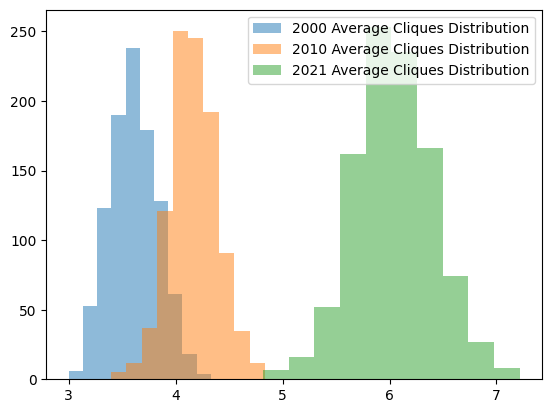

0.0
0.0
0.0


In [10]:
cliques_2000,cliques_2010, cliques_2021 = [i for i,j,k in cliques] ,  [j for i,j,k in cliques],  [k for i,j,k in cliques]

cliques_2000_m = np.mean([np.mean(cliques_2000[i]) for i in range(len(cliques_2000))])
cliques_2021_m = np.mean([np.mean(cliques_2021[i]) for i in range(len(cliques_2021))])
cliques_2010_m = np.mean([np.mean(cliques_2010[i]) for i in range(len(cliques_2010))])

cliques_2000_s = np.std([np.mean(cliques_2000[i]) for i in range(len(cliques_2000))])
cliques_2021_s = np.std([np.mean(cliques_2021[i]) for i in range(len(cliques_2021))])
cliques_2010_s = np.std([np.mean(cliques_2010[i]) for i in range(len(cliques_2010))])


samples = 1000

x1 = np.random.normal(cliques_2000_m, cliques_2000_s, samples)
x2 = np.random.normal(cliques_2010_m, cliques_2010_s, samples)
x3 = np.random.normal(cliques_2021_m, cliques_2021_s, samples)


plt.hist(x1, alpha=0.5, label='2000 Average Cliques Distribution')
plt.hist(x2, alpha=0.5, label='2010 Average Cliques Distribution')
plt.hist(x3, alpha=0.5, label='2021 Average Cliques Distribution')

plt.legend(loc='upper right')
plt.show()

p_val_x12 = list(stats.ttest_ind(x1, x2, equal_var=True))[1]
p_val_x23 = list(stats.ttest_ind(x2, x3, equal_var=True))[1]
p_val_x13 = list(stats.ttest_ind(x1, x3, equal_var=True))[1]

print(p_val_x12)
print(p_val_x23)
print(p_val_x13)

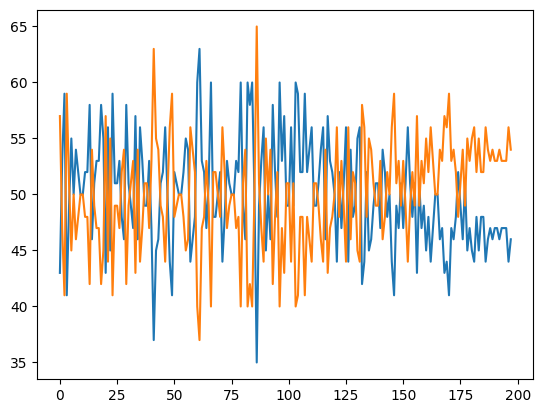

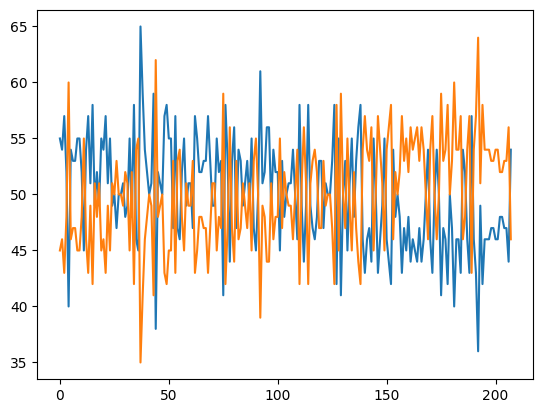

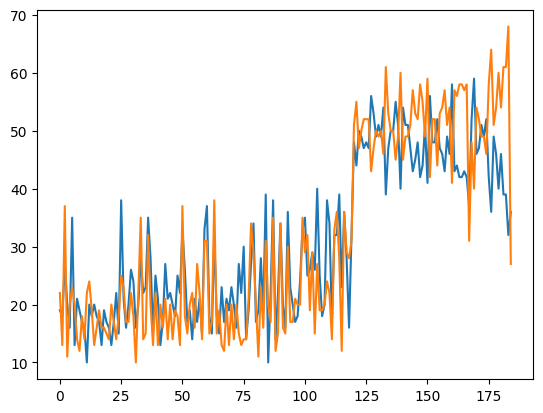

In [11]:
avg_sphere_1_00 = np.zeros((198, 198))
for i in sphere_1_00:
    for j in i:
        avg_sphere_1_00[j-1][j-1] += 1

avg_sphere_2_00 = np.zeros((198, 198))
for i in sphere_2_00:
    for j in i:
        avg_sphere_2_00[j-1][j-1] += 1
        
plt.figure()
plt.plot(np.diagonal(avg_sphere_1_00))
plt.plot(np.diagonal(avg_sphere_2_00))

avg_sphere_1_10 = np.zeros((208, 208))
for i in sphere_1_10:
    for j in i:
        avg_sphere_1_10[j-1][j-1] += 1

avg_sphere_2_10 = np.zeros((208, 208))
for i in sphere_2_10:
    for j in i:
        avg_sphere_2_10[j-1][j-1] += 1
        
plt.figure()
plt.plot(np.diagonal(avg_sphere_1_10))
plt.plot(np.diagonal(avg_sphere_2_10))

avg_sphere_1_21 = np.zeros((185, 185))
for i in sphere_1_21:
    for j in i:
        avg_sphere_1_21[j-1][j-1] += 1

avg_sphere_2_21 = np.zeros((185, 185))
for i in sphere_2_21:
    for j in i:
        avg_sphere_2_21[j-1][j-1] += 1
        
plt.figure()
plt.plot(np.diagonal(avg_sphere_1_21))
plt.plot(np.diagonal(avg_sphere_2_21))

In [12]:
'''
The following section deals with calculating the probability that the US and China are in the same bisection sphere. 
The probability can be written as P(sphere:US == shpere:China) = P(sphere1:US) * P(sphere1:China) + P(sphere2:US) * P(sphere2:China) 
'''

'\nThe following section deals with calculating the probability that the US and China are in the same bisection sphere. \nThe probability can be written as P(sphere:US == shpere:China) = P(sphere1:US) * P(sphere1:China) + P(sphere2:US) * P(sphere2:China) \n'

In [13]:
l00 = list(zip(yeardata[0]['economy'] , avg_sphere_1_00, avg_sphere_2_00))
country_probabilities_00_1 = [np.sum(l00[i][1]) for i in range(len(l00))]
country_probabilities_00_2 = [np.sum(l00[i][2]) for i in range(len(l00))]
country_probabilities_00 = list(zip(country_probabilities_00_1, country_probabilities_00_2))
country_probabilities_00
l00 = list(zip(yeardata[0]['economy'] , country_probabilities_00))

indices = [i for i in range(len(l00)) if l00[i][0] == 'USA' or l00[i][0] == 'CHN']
prob_of_same_sphere = (l00[int(indices[0])][1][0]  / 100 ) * (l00[int(indices[1])][1][0] / 100) + (l00[int(indices[0])][1][1] / 100) * (l00[int(indices[1])][1][1] / 100)
print(f'Probability of China and the US being in the same sphere in 2000 : {prob_of_same_sphere}')

Probability of China and the US being in the same sphere in 2000 : 0.5032000000000001


In [14]:
l10 = list(zip(yeardata[10]['economy'] , avg_sphere_1_10, avg_sphere_2_10))
country_probabilities_10_1 = [np.sum(l10[i][1]) for i in range(len(l10))]
country_probabilities_10_2 = [np.sum(l10[i][2]) for i in range(len(l10))]
country_probabilities_10 = list(zip(country_probabilities_10_1, country_probabilities_10_2))
country_probabilities_10
l10 = list(zip(yeardata[10]['economy'] , country_probabilities_10))

indices = [i for i in range(len(l10)) if l10[i][0] == 'USA' or l10[i][0] == 'CHN']
prob_of_same_sphere = (l10[int(indices[0])][1][0]  / 100 ) * (l10[int(indices[1])][1][0] / 100) + (l10[int(indices[0])][1][1] / 100) * (l10[int(indices[1])][1][1] / 100)
print(f'Probability of China and the US being in the same sphere in 2010 : {prob_of_same_sphere}')

Probability of China and the US being in the same sphere in 2010 : 0.4952000000000001


In [15]:
l21= list(zip(yeardata[21]['economy'] , avg_sphere_1_21, avg_sphere_2_21))
country_probabilities_21_1 = [np.sum(l21[i][1]) for i in range(len(l21))]
country_probabilities_21_2 = [np.sum(l21[i][2]) for i in range(len(l21))]
country_probabilities_21 = list(zip(country_probabilities_21_1, country_probabilities_21_2))
country_probabilities_21
l21 = list(zip(yeardata[21]['economy'] , country_probabilities_21))

indices = [i for i in range(len(l21)) if l21[i][0] == 'USA' or l21[i][0] == 'CHN']
prob_of_same_sphere = (l21[int(indices[0])][1][0]  / 100 ) * (l21[int(indices[1])][1][0] / 100) + (l21[int(indices[0])][1][1] / 100) * (l21[int(indices[1])][1][1] / 100)
print(f'Probability of China and the US being in the same sphere in 2021 : {prob_of_same_sphere}')

Probability of China and the US being in the same sphere in 2021 : 0.2988
